<a href="https://colab.research.google.com/github/AbhijeetS1112/NYC-Taxi-Trip-Time-Prediction----ALMA/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GithubLink**=https://github.com/AbhijeetS1112/NYC-Taxi-Trip-Time-Prediction----ALMA.git

## **Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City**

## **Problem Description**

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

##  **Data Description**

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
# Importing Basic Libraries
import pandas as pd # For Data Manipulation
import numpy as np  # for mathematical calculation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import warnings    # For Remove warnings 
warnings.filterwarnings("ignore")
%matplotlib inline  
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


## **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/NYC Taxi Data.csv")

## **Overview Of Dataset**

In [ ]:
# checking Top 5 Values
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Checking bottom 5 Values
df.tail(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
# checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
# Checking size of the columns and rows
print("Number of rows is >> ",df.shape[0])
print("Number of columns is >> ",df.shape[1])

Number of rows is >>  1458644
Number of columns is >>  11


In [ ]:
# Checking Features
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Checking Null Values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**So There Are No Null Values In our Dataset**
 

In [ ]:
#checking Datatypes 
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

**Here you can see pickup_datetime and dropoff_datetime feature are in object so change in datetime format**

In [ ]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])

In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [ ]:
# extracting some Features in Datetime format features
df["pickup_weekday"]=df["pickup_datetime"].dt.day_name()
df["dropoff_weekday"]=df["dropoff_datetime"].dt.day_name()
df["pickup_weekday_num"]=df["pickup_datetime"].dt.weekday
df["pickup_hour"]=df["pickup_datetime"].dt.hour
df["month"]=df["pickup_datetime"].dt.month

**We have created the following features**:

- pickup_weekday which will contain the name of the day on which the ride was taken.
-pickup_weekday_num which will contain the day number instead of characters with Monday=0 and Sunday=6.

- pickup_hour with an hour of the day in the 24-hour format.

- pickup_month with month number with January=1 and December=12.


**so here calculating distance from geographical cooradinates**

In [ ]:
from geopy.distance import great_circle
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_cordinates=(pickup_lat,pickup_long)
  end_cordinates=(dropoff_lat,dropoff_long)
  
  return great_circle(start_cordinates,end_cordinates).km


In [ ]:
# creating Feature Distance
df["distance"]=df.apply(lambda x: cal_distance(x["pickup_latitude"],x["pickup_longitude"],x["dropoff_latitude"],x["dropoff_longitude"]),axis=1)

In [ ]:
df["distance"].value_counts()

0.000000    5897
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
2.917715       1
4.698058       1
4.920641       1
2.988820       1
1.134044       1
Name: distance, Length: 1452360, dtype: int64

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance'],
      dtype='object')

In [ ]:
# calulating speed
df["speed"]=(df.distance/(df.trip_duration/3600))

In [ ]:
df["speed"].value_counts()

0.000000     5897
0.509011        5
0.152703        3
0.169670        3
0.190879        3
             ... 
8.733999        1
7.996145        1
5.057327        1
18.016528       1
20.618974       1
Name: speed, Length: 1452679, dtype: int64

**Now we will create a function that lets us determine what time of the day the ride was taken**.

We will divide the day into four parts:-

1.Morning ( 6:00 am to 11:59 pm),

2.Afternoon ( 12 noon to 3:59 pm),

3.Evening ( 4:00 pm to 9:59 pm), and

4.Late Night ( 10:00 pm to 5:59 am)

In [ ]:
def time_of_day(x):
  if x in range(6,12):
    return "Morning"
  elif x in range(12,16):
    return "Afternoon"
  elif x in range(16,22):
    return "Evening"
  else:
    return "late_night"

# creating new column for time of the day 

df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
   

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,late_night


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance', 'speed',
       'pickup_timeofday'],
      dtype='object')

## **Univariate Analysis**
Target Variable Trip_duration

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df["trip_duration"])
plt.xlabel("Trip Duration")
plt.show()


**So u can see our target variable is rightle skewwed , so we use log transformation to normalize it**

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(np.log10(df["trip_duration"]))
plt.xlabel("Trip Duration")
plt.show()

**so you can see our target variable is Normally distributed**

In [ ]:
# Checking Outliers
plt.figure(figsize=(10,5))
sns.boxplot(df["trip_duration"])
plt.xlabel("Trip Duration")
plt.show()

In [ ]:
#Calclating 0-100th percentille
for i in range(0,100,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


**So the 100th Percentile is an outlier**

In [ ]:
for i in range(90,100):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


**So Visualizing Number of trips taken in minutes**

In [ ]:
plt.figure(figsize = (10,5))
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='bar')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

In [ ]:
# seeing 10 Largest trip
print(df["trip_duration"].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


In [ ]:
# Seeing 10 smallest Trip
print(df["trip_duration"].nsmallest(10))

35196     1
207497    1
269418    1
279493    1
285635    1
311745    1
346102    1
346959    1
404610    1
451396    1
Name: trip_duration, dtype: int64


**We can see that major chunk (99th percentile) of trip duration is completed in 3440 seconds nearly 1 hour**.

- There are very few trip which have duration greater than 5000 seconds.

- There are some durations with as low as 1 second. which points towards trips with 0 km distance.

We should get rid the outliers for the sake of data consistency. (Trip duration greater than 5000 seconds and also trip duration less than 30 seconds)

In [ ]:
df=df[df.trip_duration <= 5000]
df=df[df.trip_duration >=30 ]

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df.trip_duration)
plt.xlabel("Trip Duration in sec.")
plt.show()

- Major trip durations took between 10-20 mins to complete.

- We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs. Let's move ahead to next feature


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance', 'speed',
       'pickup_timeofday'],
      dtype='object')

In [ ]:
## No of trips per time of day
plt.figure(figsize=(10,5))
sns.countplot(x="pickup_timeofday", data=df)
plt.title("pickup time of day")
plt.xlabel("parts of the day")
plt.ylabel("counts")
plt.show()

**So above u can see evening are the busiest according to late_night,Morning and Afternoon**

In [ ]:
## Vendor id
plt.figure(figsize=(10,5))
sns.countplot(x="vendor_id",data=df)
plt.title("Vendor variable")
plt.xlabel("Vendor id")
plt.ylabel("Counts")
plt.show()

**So u can see Not much difference in Both vendor**

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance', 'speed',
       'pickup_timeofday'],
      dtype='object')

In [ ]:
# passenger Count
plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count",data=df)
plt.xlabel("No of passenger")
plt.ylabel("Counts")
plt.show()

In [ ]:
df["passenger_count"].value_counts()

1    1027240
2     209224
5      77672
3      59587
6      48086
4      28254
0         24
9          1
8          1
Name: passenger_count, dtype: int64

**Removing 0,8 and 9 rows**

In [ ]:
df=df[df["passenger_count"]!=0]
df=df[df["passenger_count"]<6]

plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count",data=df)
plt.xlabel("No of Passenger")
plt.ylabel("Counts")
plt.show()

**Yo u can see Highest amount of  Trip taken By a single Passenger**

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance', 'speed',
       'pickup_timeofday'],
      dtype='object')

In [ ]:
df["store_and_fwd_flag"].value_counts(normalize=True)

N    0.994362
Y    0.005638
Name: store_and_fwd_flag, dtype: float64

- We can see that only about 1% of the trip details were stored in the vehicle memory first before sending it to the server.

- This might have occured because of the GPS or mobile device battery was down when the trip finished.


In [ ]:
# distance
df["distance"].value_counts()

0.000000    4295
0.000424      20
0.000424      12
0.001273       6
0.000848       6
            ... 
4.039002       1
2.213740       1
1.606764       1
1.364682       1
1.134044       1
Name: distance, Length: 1397584, dtype: int64

In [ ]:
# Checking distance with boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df.distance)
plt.xlabel("Distance Travelled")
plt.show()

We can clearly see that there are some trips with over 100 km distance &
Some of the trips with 0 km distance.

The possible reasons for 0 km trips can be:

- The passengers or driver cancelled the trip due to some issue.
- The dropoff location couldn’t be tracked.
- Due to some technical issue in software, etc.

So we will remove the outliers and update the values.

In [ ]:
# removing outliers 
df= df[~(df.distance > 100)]
df = df[~(df.distance < 1)]

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df.distance)
plt.xlabel("Distance Travelled")
plt.show()

In [ ]:
# Speed
df["speed"].value_counts()

9.580937     2
11.856445    1
21.002319    1
17.291763    1
11.993916    1
            ..
17.921692    1
11.835051    1
13.907607    1
26.197897    1
20.618974    1
Name: speed, Length: 1169377, dtype: int64

In [ ]:
df["speed"].nlargest(10)

906281     1408.106827
693299      583.735137
1359910     564.208013
500725      424.861414
473439      356.616642
191997      318.580003
793555      270.595438
1328401     255.419847
176589      226.716083
656806      197.129414
Name: speed, dtype: float64

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df.speed)
plt.xlabel(" Average speed")
plt.show()

We can see that there are trips that were done at a speed of over 100 km/h.

In [ ]:
df = df[~(df.speed >60)]

In [ ]:
# Lets take a look at the lowest speeds as well.
print( df['speed'].nsmallest(10))

1165873    0.777462
24426      0.825900
1025910    0.877407
1440074    0.900916
1453671    0.913801
440689     0.954780
985326     0.988256
623249     0.991219
251672     0.998664
113098     1.006520
Name: speed, dtype: float64


**This shows there are speeds which are less than 1 km/hr for a trip which again is quite unreasonable**.


In [ ]:
df=df[~(df.speed<1)]

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df.speed)
plt.xlabel("Average Speed")
plt.show()

In [ ]:
#Speed Range
plt.figure(figsize = (10,5))
df.speed.groupby(pd.cut(df.speed, np.arange(0,104,10))).count().plot(kind = 'bar')
plt.ylabel('Trip count')
plt.xlabel('Speed (Km/H)')
plt.show()

**Mostly Speed done At 10-20 km/h**

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance', 'speed',
       'pickup_timeofday'],
      dtype='object')

In [ ]:
# Trips per hour
plt.figure(figsize=(10,5))
sns.countplot(df.pickup_hour)
plt.xlabel("Time of pickup 24 hr format")
plt.show()

**We see the busiest hours are 6:00 pm to 7:00 pm (18 and 19) which makes sense as this is the time for people to return home from work**.

In [ ]:
# Trips Per weekday
plt.figure(figsize=(10,5))
sns.countplot(df.pickup_weekday)
plt.xlabel("Day of pickup")
plt.ylabel("Day of counts")
plt.show()

**We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.**

In [ ]:
# Trips per month
plt.figure(figsize=(10,5))
sns.countplot(df.month)
plt.xlabel("Months jan to june 1 to 6")
plt.ylabel("Trip Count")
plt.show()

**Not Much Difference in trip Across Month**

## **Bivariate Analysis**
Trip Duration per vendor

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()

In [ ]:
# Trip Duratio store and forward flag
plt.figure(figsize = (10,5))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind='strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (sec.)')
plt.show()

**Not Much difference N and Y store flags**

In [ ]:
# Trip Duration Per Hour
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (sec)')
plt.show()

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.

Trip duration is the lowest around 6 am as streets may not be busy.

In [ ]:
# Trip Duration Per week day
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_weekday_num',y='trip_duration',data=df)
plt.ylabel('Duration (sec)')
plt.xlabel('')
plt.show()


**Trip duration on thursday is longest among all days.**

In [ ]:
# Trip Duration Per month
plt.figure(figsize = (10,5))
sns.lineplot(x='month',y='trip_duration', data=df)
plt.ylabel('Duration (sec)')
plt.xlabel('Month of Trip ')

plt.show()

**From February, we can see trip duration rising every month.**

In [ ]:
# Distance And Vendor
plt.figure(figsize = (10,5))
sns.barplot(y='distance',x='vendor_id',data=df,estimator=np.mean)
plt.ylabel('Distance Travelled')
plt.xlabel('Vendor ID')
plt.show()

** Not Much Difference As similar Both Are**

In [ ]:
# Distance And Store And Forward Flag
plt.figure(figsize = (10,5))
sns.catplot(y='distance',x='store_and_fwd_flag',data=df,kind='strip')
plt.ylabel('Distance')
plt.xlabel('Store and Forward Flag')
plt.show()

**we See For longer time trips is not stored**

In [ ]:
# Distance and hour
plt.figure(figsize = (10,5))
sns.lineplot(y='distance',x='pickup_hour',data=df)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

Trip distance is highest during early morning hours.

It is fairly equal from morning till the evening varying around 3 - 3.5 kms.

It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.

In [ ]:
# Distance And Trip Duration
plt.figure(figsize = (10,5))
plt.scatter(x='trip_duration', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

Initially there is some proper correlation between the distance covered and the trip duration in the graph, but later on it seems a little uncorrelated.

So let us  remove those trips which covered 0 km distance.

In [ ]:
df = df[~(df.distance == 0)]

plt.figure(figsize = (10,5))
sns.regplot(df.distance, df.trip_duration)
plt.ylabel('Trip Duration')
plt.xlabel('Distance')
plt.show()

WE can see that the straight line shows some linear relation between the two.

In [ ]:
#Feature Engineering

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,late_night


In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_weekday                object
dropoff_weekday               object
pickup_weekday_num             int64
pickup_hour                    int64
month                          int64
distance                     float64
speed                        float64
pickup_timeofday              object
dtype: object

In [ ]:
# one Hot encoding
dummy=pd.get_dummies(df.store_and_fwd_flag, prefix="store_and_fwd_flag")
df=pd.concat([df,dummy],axis=1)

dummy=pd.get_dummies(df.pickup_weekday,prefix="pickup_weekday",drop_first=True)
df=pd.concat([df,dummy],axis=1)

In [ ]:
# Convert trip duration in hour
df["trip_duration_hour"] = df["trip_duration"]/3600

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,trip_duration_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening,1,0,1,0,0,0,0,0,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,late_night,1,0,0,0,1,0,0,0,0.184167


In [ ]:
# Dropping the variables which are not important for Analysis
df=df.drop(["id","pickup_datetime","dropoff_datetime","store_and_fwd_flag","pickup_weekday","dropoff_weekday","pickup_weekday_num","pickup_timeofday","speed","trip_duration"],axis=1)

In [ ]:
df.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,month,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,trip_duration_hour
0,2,1,-73.982155,40.767937,-73.964630,40.765602,17,3,1.498523,1,0,1,0,0,0,0,0,0.126389
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6,1.805510,1,0,0,0,1,0,0,0,0.184167


In [ ]:
print("Number Of rows >>",df.shape[0])
print("Number of Columns >>",df.shape[1])

Number Of rows >> 1168962
Number of Columns >> 18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168962 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vendor_id                 1168962 non-null  int64  
 1   passenger_count           1168962 non-null  int64  
 2   pickup_longitude          1168962 non-null  float64
 3   pickup_latitude           1168962 non-null  float64
 4   dropoff_longitude         1168962 non-null  float64
 5   dropoff_latitude          1168962 non-null  float64
 6   pickup_hour               1168962 non-null  int64  
 7   month                     1168962 non-null  int64  
 8   distance                  1168962 non-null  float64
 9   store_and_fwd_flag_N      1168962 non-null  uint8  
 10  store_and_fwd_flag_Y      1168962 non-null  uint8  
 11  pickup_weekday_Monday     1168962 non-null  uint8  
 12  pickup_weekday_Saturday   1168962 non-null  uint8  
 13  pickup_weekday_Sunday     1

In [ ]:
df.isnull().sum()

vendor_id                   0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
pickup_hour                 0
month                       0
distance                    0
store_and_fwd_flag_N        0
store_and_fwd_flag_Y        0
pickup_weekday_Monday       0
pickup_weekday_Saturday     0
pickup_weekday_Sunday       0
pickup_weekday_Thursday     0
pickup_weekday_Tuesday      0
pickup_weekday_Wednesday    0
trip_duration_hour          0
dtype: int64

## **Correlation**

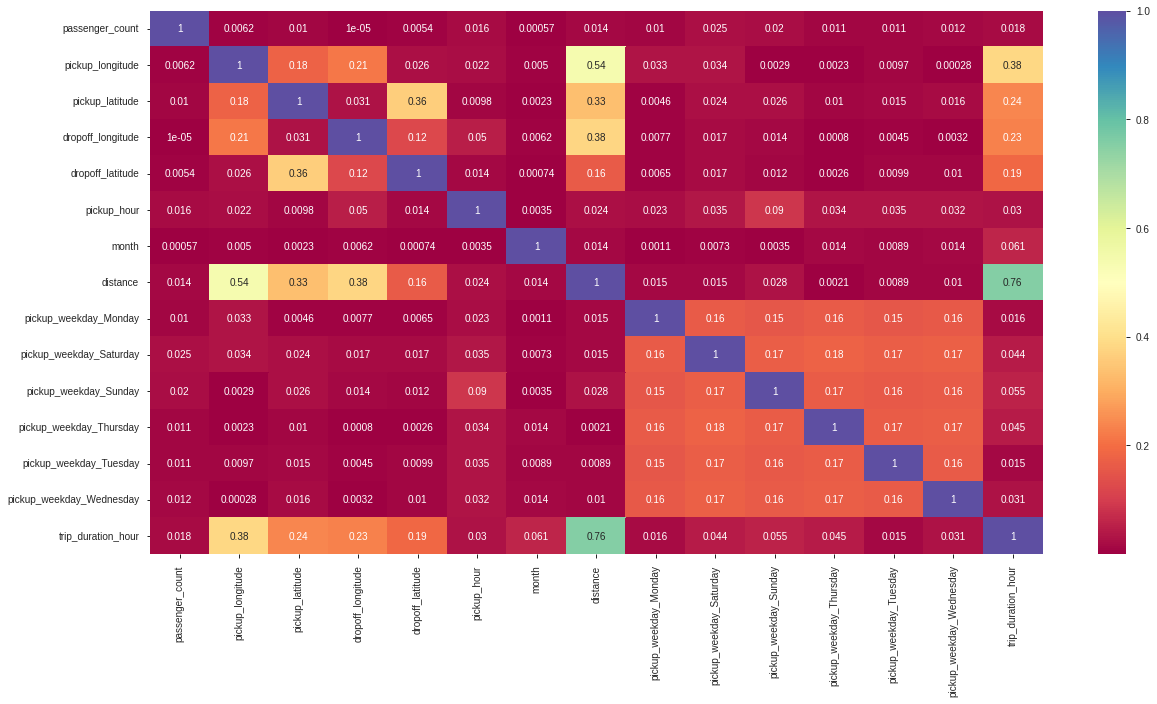

In [ ]:
plt.figure(figsize=(20,10))
x_corr=df.corr()
sns.heatmap(abs(x_corr),cmap="Spectral",annot=True)

- We can see store_and_fwd_flag_y and store_and_fwd_flag_N are highly correlated.

- Also they do not affect the target varible i.e. trip_duration_hour much. Hece we should remove these features from our dataset.

- At the same time vendor_id doesn't affect much either so we can remove that as well.

In [ ]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_hour', 'month',
       'distance', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'pickup_weekday_Monday', 'pickup_weekday_Saturday',
       'pickup_weekday_Sunday', 'pickup_weekday_Thursday',
       'pickup_weekday_Tuesday', 'pickup_weekday_Wednesday',
       'trip_duration_hour'],
      dtype='object')

In [ ]:
df=df.drop(["vendor_id","store_and_fwd_flag_N","store_and_fwd_flag_Y"],axis=1)

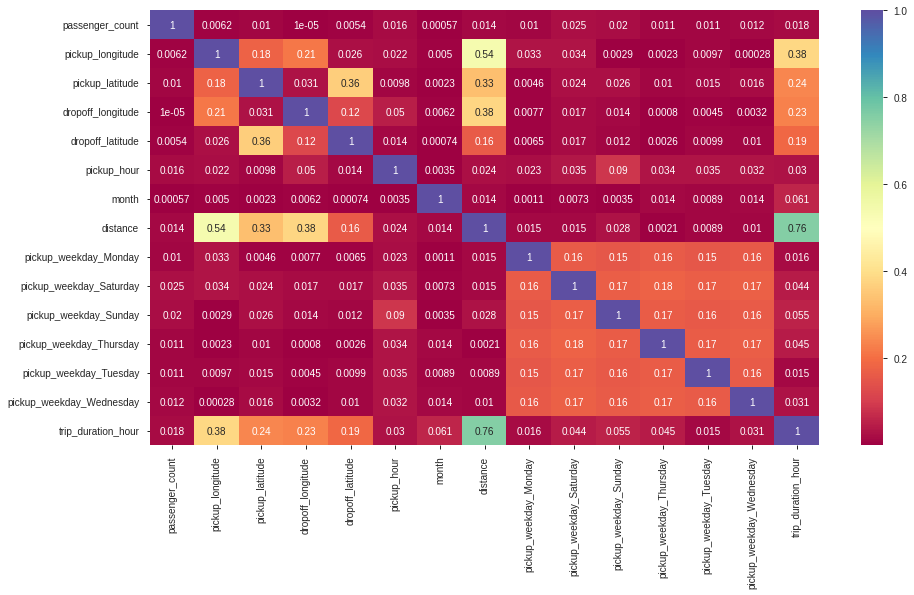

In [ ]:
plt.figure(figsize=(15,8))
x_corr=df.corr()
sns.heatmap(abs(x_corr),cmap="Spectral",annot=True)

In [ ]:
# Checking Numerical Features
numeric_features= df.describe().columns

features= numeric_features.copy()
features= list(features)
features= features[:-1]
features

['passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_hour',
 'month',
 'distance',
 'pickup_weekday_Monday',
 'pickup_weekday_Saturday',
 'pickup_weekday_Sunday',
 'pickup_weekday_Thursday',
 'pickup_weekday_Tuesday',
 'pickup_weekday_Wednesday']

In [ ]:
len(features)

14

In [ ]:
from scipy.stats import zscore
x=df[features].apply(zscore)[:]

In [ ]:
x

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,month,distance,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday
0,-0.490400,-0.236813,0.614745,0.211859,0.424219,0.517371,-0.313297,-0.611482,2.608749,-0.424463,-0.397784,-0.418833,-0.399962,-0.408611
1,-0.490400,-0.193217,-0.412609,-0.720511,-0.602626,-2.104102,1.471585,-0.535522,-0.383326,-0.424463,2.513927,-0.418833,-0.399962,-0.408611
2,-0.490400,-0.158417,0.474918,-0.877063,-1.230490,-0.407855,-1.503219,0.597640,-0.383326,-0.424463,-0.397784,-0.418833,2.500235,-0.408611
3,-0.490400,-0.935680,-1.062911,-1.062598,-1.330889,0.825779,0.281664,-0.614704,-0.383326,-0.424463,-0.397784,-0.418833,-0.399962,2.447315
4,-0.490400,-0.008701,1.498670,-0.010007,0.928489,-0.099446,-0.313297,-0.688171,-0.383326,2.355918,-0.397784,-0.418833,-0.399962,-0.408611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2.339826,-0.237960,-0.169246,-0.598250,-0.333834,-0.099446,0.281664,-0.679141,-0.383326,-0.424463,-0.397784,-0.418833,-0.399962,-0.408611
1458640,-0.490400,-0.707759,-0.104269,0.063268,1.346572,-1.024672,-1.503219,0.514683,-0.383326,-0.424463,2.513927,-0.418833,-0.399962,-0.408611
1458641,-0.490400,0.340255,0.644899,-0.852978,-1.311446,-1.178876,0.281664,0.953828,-0.383326,-0.424463,-0.397784,-0.418833,-0.399962,-0.408611
1458642,-0.490400,-0.234900,-0.045430,-0.055728,0.171004,0.208962,-1.503219,-0.711931,-0.383326,-0.424463,-0.397784,-0.418833,2.500235,-0.408611


In [ ]:
y=np.log10(df["trip_duration_hour"])[:]
y

0         -0.898291
1         -0.734789
2         -0.229148
3         -0.923845
4         -0.917813
             ...   
1458639   -0.665323
1458640   -0.740061
1458641   -0.673209
1458642   -0.984594
1458643   -1.259637
Name: trip_duration_hour, Length: 1168962, dtype: float64

In [ ]:
# Spliting The data train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=141)
print([x_train.shape,x_test.shape])
print([y_train.shape,y_test.shape])

[(876721, 14), (292241, 14)]
[(876721,), (292241,)]


In [ ]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Running RFE with output number of the variable  
lm =  LinearRegression()
rfe = RFE(lm, n_features_to_select=12)
rfe= rfe.fit(x_train, y_train)
#printing the boolean result
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True])

In [ ]:
#Assign the rfe features from x_train into col 
col= x_train.columns[rfe.support_]

## **Building The Model** 

In [ ]:
#x_train_rfe is nothing but assigning remaining features after eliminating unimportant features from x_train
x_train_rfe= x_train[col]

In [ ]:
import statsmodels.api as sm
#Adding a constant variable
x_train_rfe= sm.add_constant(x_train_rfe)

## **Making Linear Model**

In [ ]:
lm= sm.OLS(y_train, x_train_rfe).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     trip_duration_hour   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                 6.621e+04
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:33:08   Log-Likelihood:             1.7821e+05
No. Observations:              876721   AIC:                        -3.564e+05
Df Residuals:                  876708   BIC:                        -3.563e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **Making Prediction**

In [ ]:
#Making prediction
y_pred_train= lm.predict(x_train_rfe)

In [ ]:
x_test_rfe= x_test[col]
#Adding a condtant variable
x_test_rfe= sm.add_constant(x_test_rfe)

#Making prediction
y_pred_test= lm.predict(x_test_rfe)

## **Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
lr_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE >" , lr_train_mse)

lr_train_rmse = np.sqrt(lr_train_mse)

print("Train RMSE >" ,lr_train_rmse)

lr_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 >" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 > ",lr_train_r2_)

Train MSE > 0.0389909585386092
Train RMSE > 0.1974612836446912
Train R2 > 0.4754083948431509
Train Adjusted R2 >  0.4754000177104837


In [ ]:
lr_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE >" , lr_test_mse)

lr_test_rmse = np.sqrt(lr_test_mse)

print("Test RMSE >" ,lr_test_rmse)

lr_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 >" ,lr_test_r2)

lr_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Test Adjusted R2 > ",lr_test_r2_)

Test MSE > 0.03884179313429939
Test RMSE > 0.19708321373039203
Test R2 > 0.4750008345636353
Test Adjusted R2 >  0.4749756828375188


In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='green', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test, color='yellow', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test, color='yellow', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

**As we can clearly see the Linear regression model does not provide us with high accuracy. It has high prediction error on the metrics we tested.**


## **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Cross Validation
lasso=Lasso()
parameters={"alpha":[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring="r2",cv=5)
lasso_regressor.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

In [ ]:
lasso_regressor.best_estimator_

In [ ]:
lasso_regressor.score(x_train,y_train)

In [ ]:
y_pred_lasso_train=lasso_regressor.predict(x_train)
y_pred_lasso_test=lasso_regressor.predict(x_test)

## **Model Evaluation**

In [ ]:
lasso_train_mse  = mean_squared_error((y_train), (y_pred_lasso_train))
print("Train MSE >" , lasso_train_mse)

lasso_train_rmse = np.sqrt(lasso_train_mse)

print("Train RMSE >" ,lasso_train_rmse)

lasso_train_r2 = r2_score((y_train), (y_pred_lasso_train))
print("Train R2 >" ,lasso_train_r2) 

lasso_train_r2_ = 1-(1-r2_score((y_train), (y_pred_lasso_train)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 > ",lasso_train_r2_)

In [ ]:
lasso_test_mse  = mean_squared_error((y_test), (y_pred_lasso_test))
print("Test MSE >" , lasso_test_mse)

lasso_test_rmse = np.sqrt(lasso_test_mse)

print("Test RMSE >" ,lasso_test_rmse)

lasso_test_r2 = r2_score((y_test), (y_pred_lasso_test))
print("Test R2 >" ,lasso_test_r2) 

lasso_test_r2_ = 1-(1-r2_score((y_test), (y_pred_lasso_test)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Test Adjusted R2 > ",lasso_test_r2_)

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='green', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso_test, color='yellow', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_lasso_test, color='yellow', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

## **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}
The R2 score using the same alpha is : 0.47548346016770865


In [ ]:
ridge_regressor.best_estimator_

Ridge(alpha=20)

In [ ]:
ridge_regressor.score(x_train, y_train)

0.4755119142858747

In [ ]:
y_pred_ridge_train=ridge_regressor.predict(x_train)

In [ ]:
y_pred_ridge_test = ridge_regressor.predict(x_test)

## **Model Evaluation**

In [ ]:
ridge_train_mse  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

ridge_train_rmse = np.sqrt(ridge_train_mse)
print("Train RMSE :" ,ridge_train_rmse)

ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

ridge_train_r2_= 1-(1-r2_score(y_train, y_pred_ridge_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_r2)

Train MSE : 0.03898326432036494
Train RMSE : 0.19744179983064614
Train R2 : 0.4755119142858747
Train Adjusted R2 :  0.4755119142858747


In [ ]:
ridge_test_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_rmse = np.sqrt(ridge_test_mse)
print("Test RMSE :" ,ridge_test_rmse)

ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_= 1-(1-r2_score(y_test, y_pred_ridge_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_r2_)

Test MSE : 0.038833677359541595
Test RMSE : 0.19706262293885565
Test R2 : 0.4751105301938031
Test Adjusted R2 :  0.4750853837229987


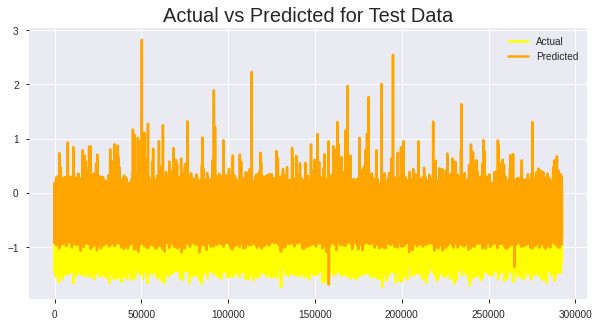

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='Yellow', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_ridge_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

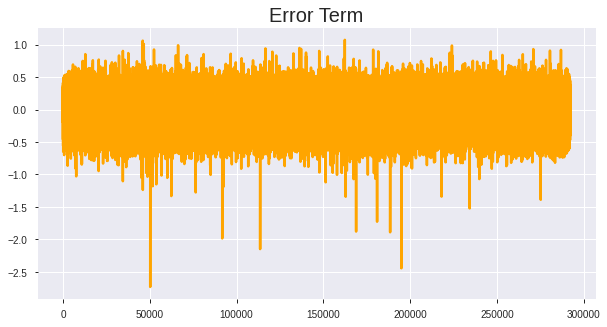

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_ridge_test, color='Orange', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

## **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]
 
# Minimum number of samples required to split a node
min_samples_split = [10,20,30]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]
 
# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
#the cache variables contains the best parameters for the Decision Tree that we already tested before to save time when running again
cache = {
              'max_depth' : [10],
              'min_samples_split' : [10],
              'min_samples_leaf' : [22]}

In [ ]:
param_dict_dt

{'max_depth': [4, 6, 8, 10],
 'min_samples_split': [10, 20, 30],
 'min_samples_leaf': [8, 16, 22]}

In [ ]:
dt = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt,
                       param_grid = cache,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.6s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.0s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   5.8s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.0s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   5.9s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [22],
                         'min_samples_split': [10]},
             scoring='r2', verbose=2)

In [ ]:
dt_grid.best_score_

0.6971121470251649

In [ ]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10)

In [ ]:
y_pred_dt_train=dt_grid.predict(x_train)

In [ ]:
y_pred_dt_test=dt_grid.predict(x_test)

## **Model Evaluation**

In [ ]:
dt_train_mse  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , dt_train_mse)

dt_train_rmse = np.sqrt(dt_train_mse)
print("Train RMSE :" ,dt_train_rmse)

dt_train_r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,dt_train_r2)

dt_train_r2_= 1-(1-r2_score(y_train, y_pred_dt_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 : ", dt_train_r2_)

Train MSE : 0.022157111314486104
Train RMSE : 0.14885264967237266
Train R2 : 0.701894105050133
Train Adjusted R2 :  0.7018893446372588


In [ ]:
dt_test_mse  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , dt_test_mse)
dt_test_rmse = np.sqrt(dt_test_mse)
print("Test RMSE :" ,dt_test_rmse)

dt_test_r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,dt_test_r2)

dt_test_r2_= 1-(1-r2_score(y_test, y_pred_dt_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_test_r2_)

Test MSE : 0.022426444305064106
Test RMSE : 0.14975461363532044
Test R2 : 0.6968763902543208
Test Adjusted R2 :  0.696861868170261


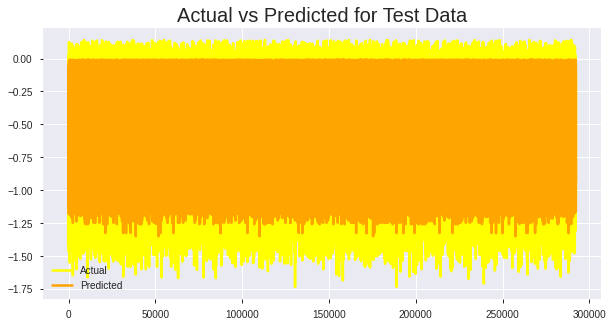

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='yellow', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_dt_test, color='Orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

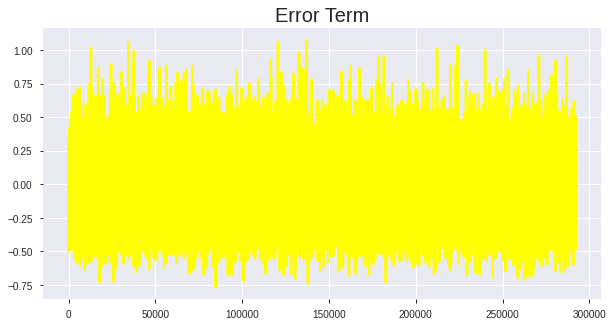

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_dt_test, color='yellow', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

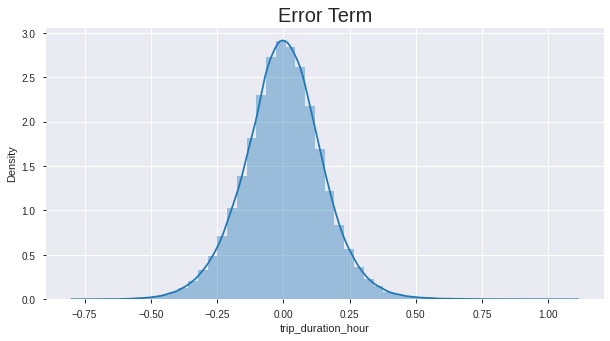

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(y_test - y_pred_dt_test )
plt.title('Error Term', fontsize=20)
plt.show()

The decision tree with the selected hyperparameters does improve the predictions of the model considerably. 

It still isn't ideal but it is certainly much better than Linear models.

## **XGBoost Regressor**

In [ ]:
n_estimators = [80,150,200]
 
# Maximum depth of trees
max_depth = [5,8,10]
min_samples_split = [40,50]
learning_rate=[0.2,0.4,0.6]
 
# Hyperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_' : min_samples_split,
             'learning_rate' : learning_rate
             }
#the cache variables contains the best parameters for the XGBoost which we already tested before to save time when running it again.
cache = {'n_estimators' : [200],
              'max_depth' : [8],
             'min_samples_' : [40],
             'learning_rate' : [0.2],
             }

In [ ]:
param_xgb

{'n_estimators': [80, 150, 200],
 'max_depth': [5, 8, 10],
 'min_samples_': [40, 50],
 'learning_rate': [0.2, 0.4, 0.6]}

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(tree_method = 'hist')

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid = cache,
                        cv = 3, verbose=1,
                        scoring="r2")

xgb_grid.fit(x_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[02:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:21:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(tree_method='hist'),
             param_grid={'learning_rate': [0.2], 'max_depth': [8],
                         'min_samples_': [40], 'n_estimators': [200]},
             scoring='r2', verbose=1)

In [ ]:
xgb_grid.best_score_

0.8110790241497848

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'min_samples_': 40, 'n_estimators': 200}

In [ ]:
y_pred_xgb_train=xgb_grid.predict(x_train)

In [ ]:
y_pred_xgb_test=xgb_grid.predict(x_test)

In [ ]:
y_pred_xgb_test=xgb_grid.predict(x_test)

## **Model Evaluation**

In [ ]:
xgb_train_mse  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , xgb_train_mse)

xgb_train_rmse = np.sqrt(xgb_train_mse)
print("Train RMSE :" ,xgb_train_rmse)

xgb_train_r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,xgb_train_r2)

xgb_train_r2_= 1-(1-r2_score((y_train), (y_pred_xgb_train)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 : ", xgb_train_r2_)

Train MSE : 0.01245525489950309
Train RMSE : 0.11160311330560224
Train R2 : 0.8324246849715662
Train Adjusted R2 :  0.832422008983937


In [ ]:
xgb_test_mse  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , xgb_test_mse)

xgb_test_rmse = np.sqrt(xgb_test_mse)
print("Test RMSE :" ,xgb_test_rmse)

xgb_test_r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,xgb_test_r2)

xgb_test_r2_= 1-(1-r2_score((y_test), (y_pred_xgb_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Test Adjusted R2 : ", xgb_test_r2_)

Test MSE : 0.013831863651703922
Test RMSE : 0.1176089437572837
Test R2 : 0.8130437271918411
Test Adjusted R2 :  0.8130347704671852


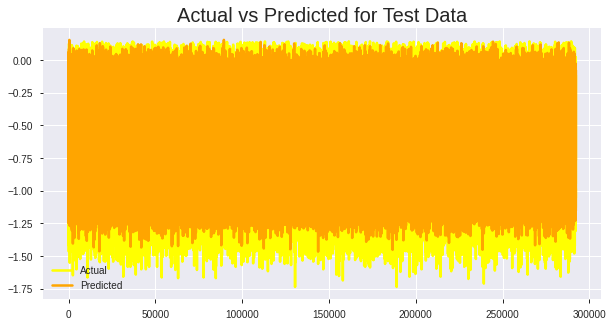

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='yellow', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_xgb_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

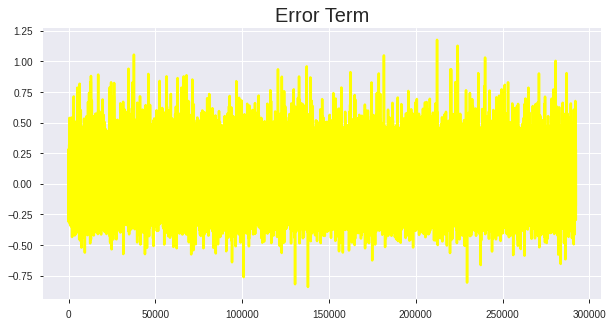

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_xgb_test, color='yellow', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

In [ ]:
# Faetures Importance

In [ ]:
importance_df= pd.DataFrame({'Features': features, 'Feature_importance': list(xgb_grid.best_estimator_.feature_importances_)})
importance_df

,Features,Feature_importance
0,passenger_count,0.002555
1,pickup_longitude,0.018786
2,pickup_latitude,0.017618
3,dropoff_longitude,0.019079
4,dropoff_latitude,0.036412
5,pickup_hour,0.073638
6,month,0.011254
7,distance,0.563827
8,pickup_weekday_Monday,0.045855
9,pickup_weekday_Saturday,0.079922


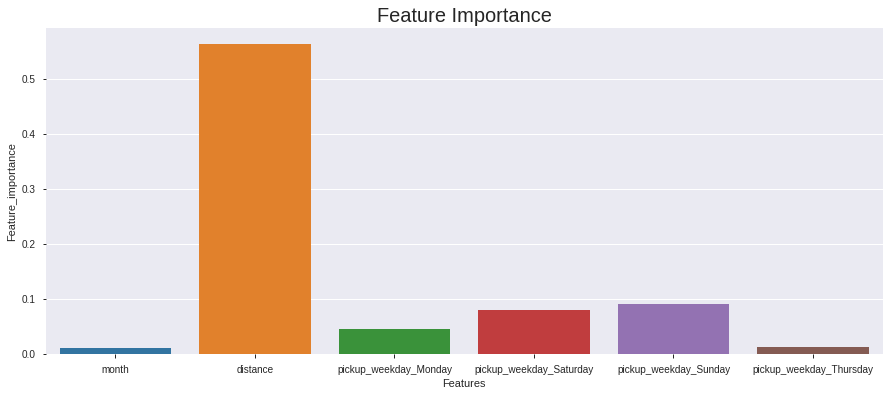

In [ ]:
# plotting feature importance

plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Features',y="Feature_importance", data=importance_df[6:12])
plt.show()

 **Distance Is top contributar to trip duration**

## **Model Summary**

 for Train data

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor']
train_mse= [lr_train_mse, lasso_train_mse, ridge_train_mse, dt_train_mse, xgb_train_mse]
train_rmse= [lr_train_rmse, lasso_train_rmse, ridge_train_rmse, dt_train_rmse, xgb_train_rmse]
train_r2= [lr_train_r2, lasso_train_r2, ridge_train_r2, dt_train_r2, xgb_train_r2]
train_adjusted_r2= [lr_train_r2_, lasso_train_r2_, ridge_train_r2_, dt_train_r2_, xgb_train_r2_]

For Test Data

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor']
test_mse= [lr_test_mse, lasso_test_mse, ridge_test_mse, dt_test_mse, xgb_test_mse]
test_rmse= [lr_test_rmse, lasso_test_rmse, ridge_test_rmse, dt_test_rmse, xgb_test_rmse]
test_r2= [lr_test_r2, lasso_test_r2, ridge_test_r2, dt_test_r2, xgb_test_r2]
test_adjusted_r2= [lr_test_r2_, lasso_test_r2_, ridge_test_r2_, dt_test_r2_, xgb_test_r2_]

In [ ]:
Train_data_df=pd.DataFrame({'Model Name': models, 'Train MSE': train_mse, 'Train RMSE': train_rmse, 'Train R^2': train_r2, 
                            'Train Adjusted R^2': train_adjusted_r2})
Train_data_df

,Model Name,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
0,Linear Regression,0.038991,0.197461,0.475408,0.475400
1,Lasso Regression,0.038983,0.197442,0.475512,0.475504
2,Ridge Regression,0.038983,0.197442,0.475512,0.475504
3,DecisionTree Regressor,0.022157,0.148853,0.701894,0.701889
4,XGBoost Regressor,0.012455,0.111603,0.832425,0.832422


In [ ]:
Test_data_df= pd.DataFrame({'Model Name': models, 'Test MSE': test_mse, 'Test RMSE': test_rmse, 'Test R^2': test_r2, 
                            'Test Adjusted R^2': test_adjusted_r2})
Test_data_df

,Model Name,Test MSE,Test RMSE,Test R^2,Test Adjusted R^2
0,Linear Regression,0.038842,0.197083,0.475001,0.474976
1,Lasso Regression,0.038834,0.197063,0.475110,0.475102
2,Ridge Regression,0.038834,0.197063,0.475111,0.475085
3,DecisionTree Regressor,0.022426,0.149755,0.696876,0.696862
4,XGBoost Regressor,0.013832,0.117609,0.813044,0.813035


## **Conclusion**
- The Linear model do not give good accuracy on training and testing time.
- XGBoost Model is the best model as compare to other models to predicting trip duration for taxi.
- MSE And RMSE is not much varying when we do performance on the time of Decision Tree Regressor or XGBoost Regressor.
